In [353]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
#from sklearn import linear_model


In [354]:
# 讀檔
df = pd.read_csv("BlackFriday.csv")

In [355]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [357]:
print("Users ",df['User_ID'].nunique())
print("Products ",df['Product_ID'].nunique())
print("Transactions ",len(df))

Users  5891
Products  3623
Transactions  537577


# 預處理

In [358]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [359]:
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [360]:
df.fillna(value=0,inplace=True)
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


# Exploratory Data Analysis

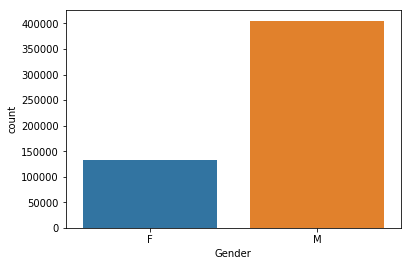

In [361]:
sns.countplot(df['Gender'])

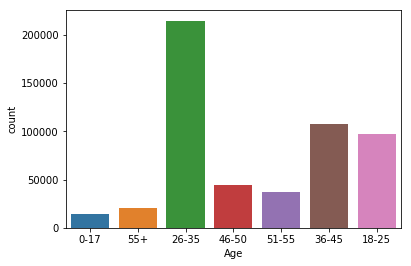

In [362]:
sns.countplot(df['Age'])

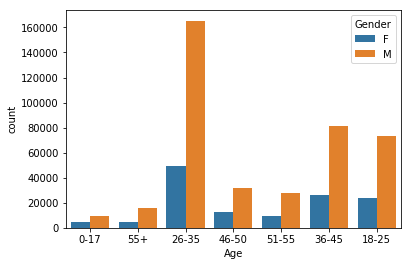

In [363]:
sns.countplot(df['Age'],hue=df['Gender'])

['F_0' 'M_0' 'M_1' 'F_1']


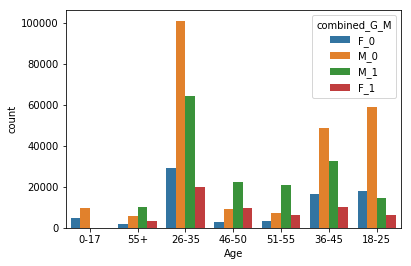

In [364]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())
sns.countplot(df['Age'],hue=df['combined_G_M'])

In [365]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'combined_G_M'],
      dtype='object')

In [366]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,M_0


In [367]:
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Age'] = lb.fit_transform(df['Age'])
df['City_Category'] = lb.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = lb.fit_transform(df['Stay_In_Current_City_Years'])

In [368]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,F_0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,F_0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,F_0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,F_0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,M_0


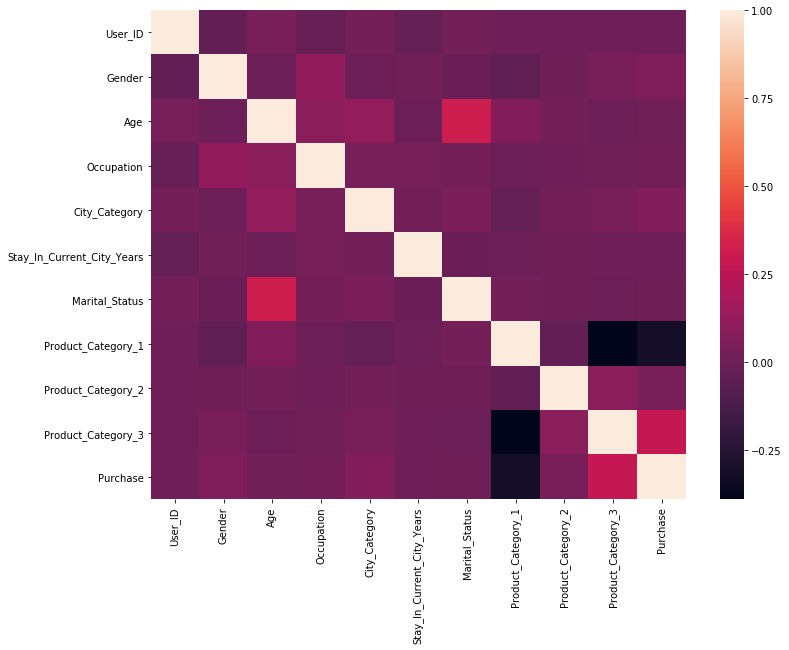

In [369]:
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(df.corr())

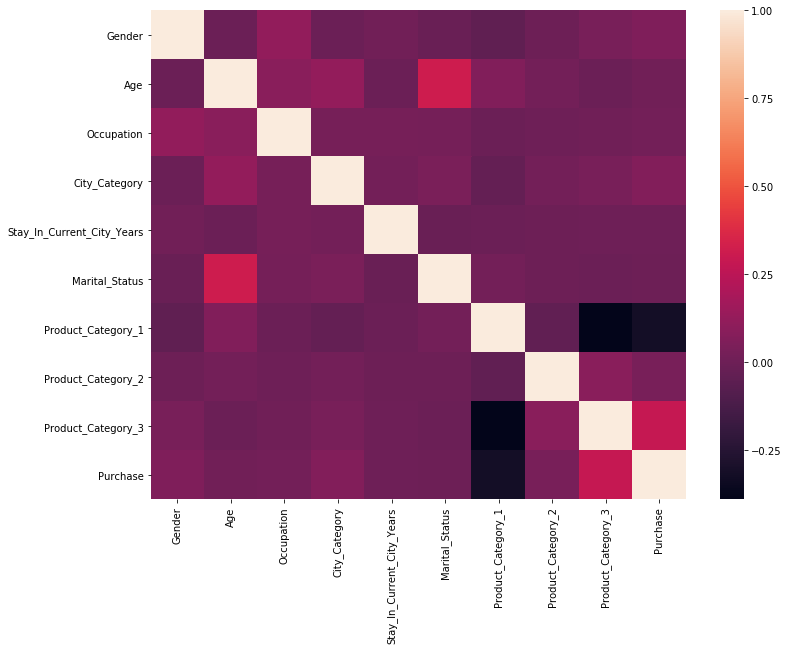

In [370]:
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(df.drop(['User_ID','Product_ID'],axis=1).corr())

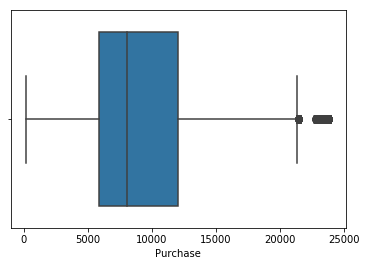

In [371]:
sns.boxplot(x='Purchase',data=df)

In [20]:
df['Purchase'].mean()

9333.859852635065

# 資料預處理

In [372]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,F_0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,F_0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,F_0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,F_0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,M_0


In [377]:
df['Purchase_category'] = df['Purchase']

In [378]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M,Purchase_category
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,F_0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,F_0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,F_0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,F_0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,M_0,7969


In [379]:
df['Purchase_category'][df['Purchase_category'] < df['Purchase'].mean()] = 0
df['Purchase_category'][df['Purchase_category'] >= df['Purchase'].mean()] = 1

C:\Users\Raiven\Anaconda3\envs\gtx660\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Raiven\Anaconda3\envs\gtx660\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [380]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M,Purchase_category
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,F_0,0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,F_0,1
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,F_0,0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,F_0,0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,M_0,0


In [118]:
df2 = df[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


In [119]:
X = X = df2.drop(['Purchase'],axis=1)
Y = df2['Purchase']

In [120]:
X.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
537572,1,3,16,2,1,0,1,2,0
537573,1,3,16,2,1,0,1,15,16
537574,1,3,16,2,1,0,8,15,0
537575,1,3,16,2,1,0,5,0,0
537576,1,3,16,2,1,0,5,8,0


In [121]:
Y.tail()

537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, dtype: int64

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # 30% 測試資料, 70% 訓練資料

In [123]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(376303, 9) (376303,)
(161274, 9) (161274,)


# 建立模型

In [320]:
# 建立線性堆曐模型
model = Sequential()
# 建立輸入層與隠藏層
model.add(Dense(units=1000, 
                input_dim=9, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.3))
# 建立隠藏層
model.add(Dense(units=500,
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=125,
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.1))
# 建立輸出層
model.add(Dense(units=1, 
                kernel_initializer='normal'))
# 定義訓練方式
model.compile(loss='logcosh', 
              optimizer='Adamax')

# 查看模型摘要
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 1000)              10000     
_________________________________________________________________
dropout_52 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_53 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 125)               62625     
_________________________________________________________________
dropout_54 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 126       
Total para

In [331]:
# 開始訓練, 80%訓練, 20%驗證, 執行20次訓練週期, 每次50筆資料
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
#'verbose=0' will show you nothing (silent)
# 'verbose=1' will show you an animated progress bar 
#'verbose=2' will just mention the number of epoch
train_history =model.fit(x=X_train,
                         y=Y_train,validation_split=0.2, 
                         epochs=20, batch_size=50,verbose=1)

Train on 301042 samples, validate on 75261 samples
Epoch 1/20
301042/301042 [==============================] - 32s 105us/step - loss: 2763.9387 - val_loss: 2618.6318
Epoch 2/20
301042/301042 [==============================] - 31s 103us/step - loss: 2716.7354 - val_loss: 2553.2844
Epoch 3/20
301042/301042 [==============================] - 31s 103us/step - loss: 2651.4245 - val_loss: 2500.1128
Epoch 4/20
301042/301042 [==============================] - 32s 105us/step - loss: 2611.2321 - val_loss: 2568.4738
Epoch 5/20
301042/301042 [==============================] - 30s 101us/step - loss: 2591.3183 - val_loss: 2437.6245
Epoch 6/20
301042/301042 [==============================] - 32s 105us/step - loss: 2571.5184 - val_loss: 2414.3776
Epoch 7/20
301042/301042 [==============================] - 31s 103us/step - loss: 2555.4979 - val_loss: 2420.7988
Epoch 8/20
301042/301042 [==============================] - 31s 104us/step - loss: 2540.6178 - val_loss: 2409.0972
Epoch 9/20
301042/301042 [===

In [332]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [333]:
# 畫出accuracy結果
#show_train_history(train_history,'acc','val_acc')

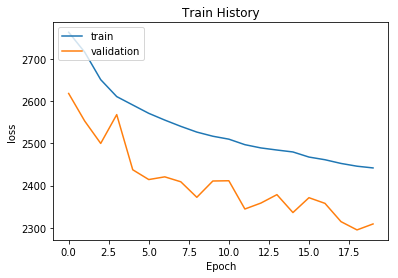

In [334]:
# 畫出loss結果
show_train_history(train_history,'loss','val_loss')

In [335]:
Y_pred = model.predict(X_test)
Y_pred = np.array(Y_pred)
Y_test_view = np.array(Y_test)
#plt.scatter(, Y_test)
#plt.show()

In [336]:
Y_test_view.shape

(161274,)

In [337]:
Y_pred.shape

(161274, 1)

In [338]:
Y_pred_view = Y_pred.flatten()

In [339]:
Y_pred_view.shape

(161274,)

In [340]:
results = abs( Y_pred_view - Y_test_view )
'{:.2f}'.format(results.mean())

'2312.98'

# 分類法

In [381]:
df3 = df[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Purchase_category','Product_Category_1','Product_Category_2','Product_Category_3']]
df3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_category,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,0,3,0,0
1,0,0,10,0,2,0,1,1,6,14
2,0,0,10,0,2,0,0,12,0,0
3,0,0,10,0,2,0,0,12,14,0
4,1,6,16,2,4,0,0,8,0,0


In [382]:
X = df3.drop(['Purchase_category'],axis=1)
Y = df3['Purchase_category']

In [383]:
X.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
537572,1,3,16,2,1,0,1,2,0
537573,1,3,16,2,1,0,1,15,16
537574,1,3,16,2,1,0,8,15,0
537575,1,3,16,2,1,0,5,0,0
537576,1,3,16,2,1,0,5,8,0


In [384]:
Y.tail()

537572    1
537573    1
537574    0
537575    0
537576    0
Name: Purchase_category, dtype: int64

In [385]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # 30% 測試資料, 70% 訓練資料
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(376303, 9) (376303,)
(161274, 9) (161274,)


In [386]:
Y_TrainOneHot = np_utils.to_categorical(Y_train)
Y_TestOneHot = np_utils.to_categorical(Y_test)

In [387]:
Y_train.tail()

305228    1
101989    1
216916    1
218152    1
7655      0
Name: Purchase_category, dtype: int64

In [388]:
Y_TrainOneHot[-5:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [416]:
# 建立線性堆曐模型
model = Sequential()
model.add(Dense(units=1000, 
                input_dim=9, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=500, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=125, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2, 
                kernel_initializer='normal', 
                activation='softmax'))
# 定義訓練方式
model.compile(loss='binary_crossentropy', 
              optimizer='Nadam', metrics=['accuracy'])

# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 1000)              10000     
_________________________________________________________________
dropout_66 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_67 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 125)               62625     
_________________________________________________________________
dropout_68 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 2)                 252       
Total para

In [417]:
# 開始訓練, 80%訓練, 20%驗證, 執行10次訓練週期, 每次200筆資料
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
#'verbose=0' will show you nothing (silent)
# 'verbose=1' will show you an animated progress bar 
#'verbose=2' will just mention the number of epoch
train_history =model.fit(x=X_train,
                         y=Y_TrainOneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=1)

Train on 301042 samples, validate on 75261 samples
Epoch 1/10
301042/301042 [==============================] - 13s 44us/step - loss: 0.4416 - acc: 0.8033 - val_loss: 0.4019 - val_acc: 0.8306
Epoch 2/10
301042/301042 [==============================] - 12s 41us/step - loss: 0.3763 - acc: 0.8356 - val_loss: 0.3585 - val_acc: 0.8454
Epoch 3/10
301042/301042 [==============================] - 12s 41us/step - loss: 0.3648 - acc: 0.8403 - val_loss: 0.3497 - val_acc: 0.8494
Epoch 4/10
301042/301042 [==============================] - 12s 40us/step - loss: 0.3583 - acc: 0.8424 - val_loss: 0.3475 - val_acc: 0.8474
Epoch 5/10
301042/301042 [==============================] - 12s 40us/step - loss: 0.3553 - acc: 0.8448 - val_loss: 0.3409 - val_acc: 0.8495
Epoch 6/10
301042/301042 [==============================] - 12s 41us/step - loss: 0.3489 - acc: 0.8485 - val_loss: 0.3341 - val_acc: 0.8597
Epoch 7/10
301042/301042 [==============================] - 12s 41us/step - loss: 0.3481 - acc: 0.8491 - val_

In [418]:

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

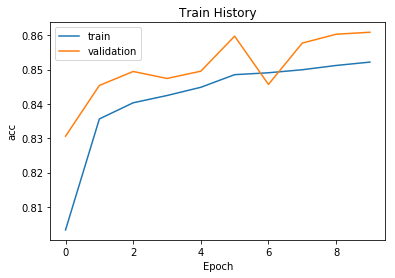

In [419]:
# 畫出accuracy結果
show_train_history(train_history,'acc','val_acc')

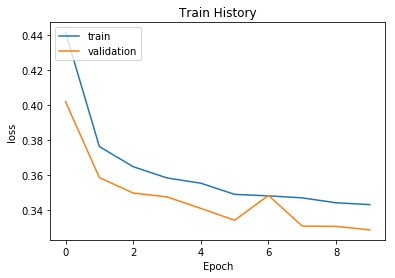

In [420]:
# 畫出loss結果
show_train_history(train_history,'loss','val_loss')

In [421]:
scores = model.evaluate(X_test, Y_TestOneHot)
print()
print('accuracy=',scores[1])

161274/161274 [==============================] - 8s 47us/step

accuracy= 0.8608083137969217


# 預測

In [422]:
prediction=model.predict_classes(X_test)
prediction

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [423]:

pd.crosstab(Y_test,prediction,
            rownames=['true'],colnames=['predict'])

predict,0,1
true,,
0,83533,13180
1,9268,55293
